In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('all.csv')
#dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:3].astype(float)
Id = dataset[:,3].reshape(-1, 1)
print(X[1])

[0.6  1.2  0.01]


In [13]:
X_p = X[1176:,:]
Id_p = Id[1176:,:]
print(Id_p[0])
print(X_p[0])

[2.07e-18]
[-2.37e-42  0.00e+00 -1.19e-42]


In [14]:

output_p = np.log10(Id_p)

In [16]:
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(X_p, output_p, test_size=0.05)
n_features = X_ptrain.shape[1]

In [18]:
model = Sequential()
model.add(Dense(5, activation='tanh',  kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(15, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(20, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))

In [19]:
model.compile(optimizer='adam', loss='mse')

In [20]:
model.fit(X_ptrain, y_ptrain, epochs=100, batch_size=4096, verbose=1)

Epoch 1/1000
247/247 [==============================] - 0s 1ms/step - loss: 15.8965
Epoch 2/1000
247/247 [==============================] - 0s 1ms/step - loss: 6.9170
Epoch 3/1000
247/247 [==============================] - 0s 969us/step - loss: 3.5566
Epoch 4/1000
247/247 [==============================] - 0s 987us/step - loss: 1.4830
Epoch 5/1000
247/247 [==============================] - 0s 1ms/step - loss: 0.8478
Epoch 6/1000
247/247 [==============================] - 0s 1ms/step - loss: 0.6063
Epoch 7/1000
247/247 [==============================] - 0s 991us/step - loss: 0.4892
Epoch 8/1000
247/247 [==============================] - 0s 976us/step - loss: 0.4245
Epoch 9/1000
247/247 [==============================] - 0s 993us/step - loss: 0.3836
Epoch 10/1000
247/247 [==============================] - 0s 1ms/step - loss: 0.3609
Epoch 11/1000
247/247 [==============================] - 0s 989us/step - loss: 0.3437
Epoch 12/1000
247/247 [==============================] - 0s 1ms/step - l

In [21]:
error = model.evaluate(X_ptest, y_ptest, verbose=1)
print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))

13/13 [==============================] - 0s 920us/step - loss: 0.0040
MSE: 0.004, RMSE: 0.063


In [22]:
model.save("drain_current_p.h5")

In [25]:
from keras.models import load_model
drain_current_p = load_model('drain_current_p.h5')

For testing the model

In [63]:
df = pd.read_csv('all_test.csv')
#dataframe = pandas.read_csv("sonar.csv", header=None)
dataset = df.values
# split into input (X) and output (Y) variables
X_t = dataset[:,0:3].astype(float)
Id_t = dataset[:,3].reshape(-1, 1)
print(X_t[0])

[-2.37e-42  0.00e+00 -1.19e-42]


Input for  testing the model

In [67]:
X_test = X_t[910:1092,:]
Id_test = Id_t[910:1092,:]
X_test1 = X_t[1457:1638,:]
Id_test1 = Id_t[1457:1638,:]
print(X_test1[-1])
print(Id_test1[-1])
print(X_test[-1])
print(Id_test[-1])
print(X_test[0])
print(Id_test[0])

[-1.3e-34  1.0e-01  9.0e+00]
[1.45e-06]
[-0.3  1.   9. ]
[0.000781]
[-3.00e-01  1.00e+00 -1.83e-35]
[0.000137]


In [46]:
Y_predict = drain_current_p.predict(X_test)

In [55]:
Y_predict_1= [pow(10, element) for element in Y_predict]
Vd1= dataset[:,2].reshape(-1, 1)
Vd = Vd1[910:1092,:]

print(Vd.shape)
print(len(Y_predict_1))
print(Id_test.shape)

(182, 1)
182
(182, 1)


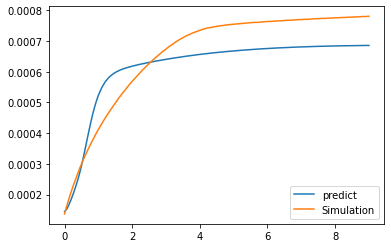

In [74]:
plt.plot(Vd,Y_predict_1)
plt.plot(Vd,Id_test)
plt.legend(["predict", "Simulation"], loc ="lower right")

In [75]:
Y_predict11 = drain_current_p.predict(X_test1)

In [76]:
plt.savefig('Vs=-0.3V _ Vg=1V.png')

<Figure size 432x288 with 0 Axes>

In [77]:
Y_predict_11= [pow(10, element) for element in Y_predict11]
Vd1= dataset[:,2].reshape(-1, 1)
Vd11 = Vd1[1457:1638,:]

In [78]:
print(Vd11.shape)
print(len(Y_predict_11))
print(Id_test1.shape)

(181, 1)
181
(181, 1)


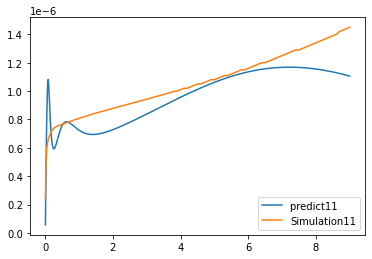

In [84]:
plt.plot(Vd11,Y_predict_11)
plt.plot(Vd11,Id_test1)
#plt.plot(Vd,Y_predict_1)
##plt.plot(Vd,Id_test)
plt.legend(["predict11 ", "Simulation11","predict12 ", "Simulation12"], loc ="lower right")

In [81]:
plt.savefig('1.png')

<Figure size 432x288 with 0 Axes>